# Reliability diagram verifications

In [1]:
# general tools
import os
import sys
import time
import h5py
from glob import glob

import numpy as np
from datetime import datetime, timedelta

In [2]:
# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import verif_utils as vu
import graph_utils as gu

In [4]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [5]:
colors_sub = np.array([[248, 206, 204], [218, 232, 252], [232, 232, 232]])/255
colors_main = [red, blue, cyan]

In [6]:
name_AnEn_ = result_dir+'AnEn_reliability_thres{}_lead{}_{}_new.npy'
name_LDM_ = result_dir+'LDM_reliability_thres{}_lead{}_{}_new.npy'
name_RAW_ = result_dir+'RAW_reliability_thres{}_lead{}_{}.npy'

### Full domain 1, 5, 10, 15, 20, 25, 30, 35 mm threshold

In [7]:
# def legend_format(LG):
#     LG.get_frame().set_facecolor('none')
#     LG.get_frame().set_linewidth(0)
#     LG.get_frame().set_alpha(1.0)

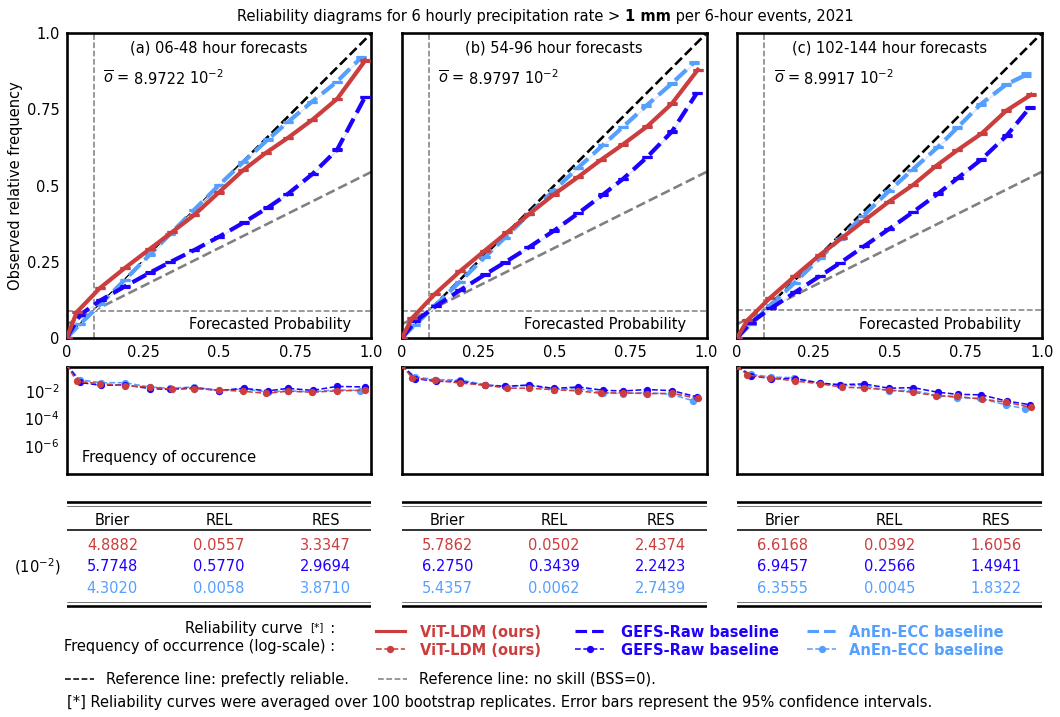

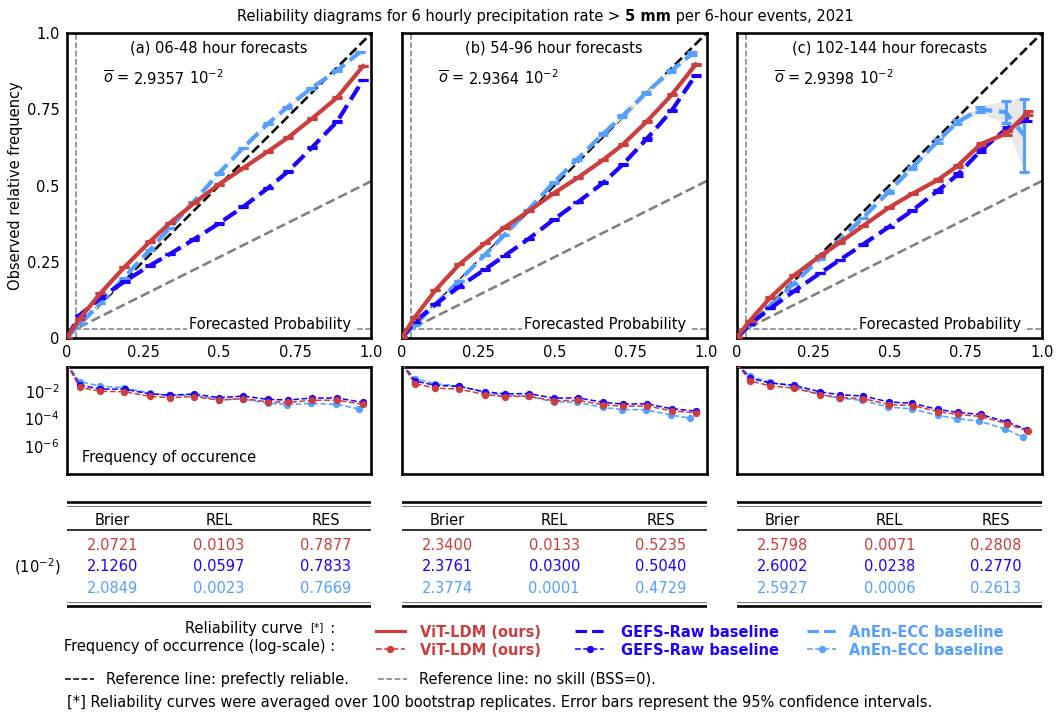

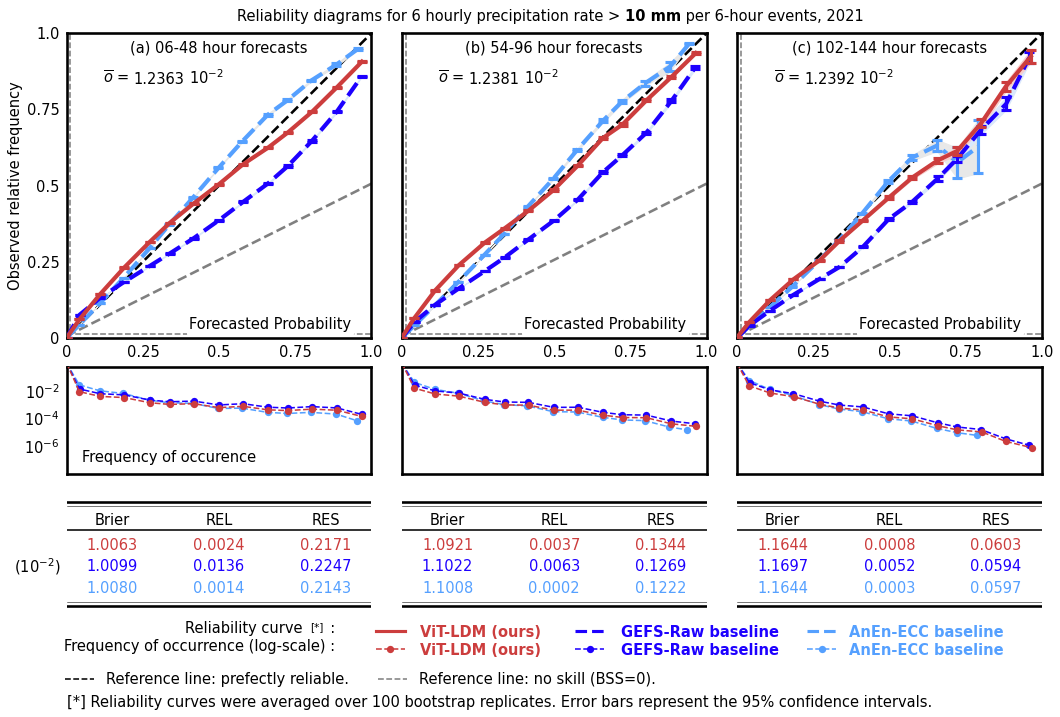

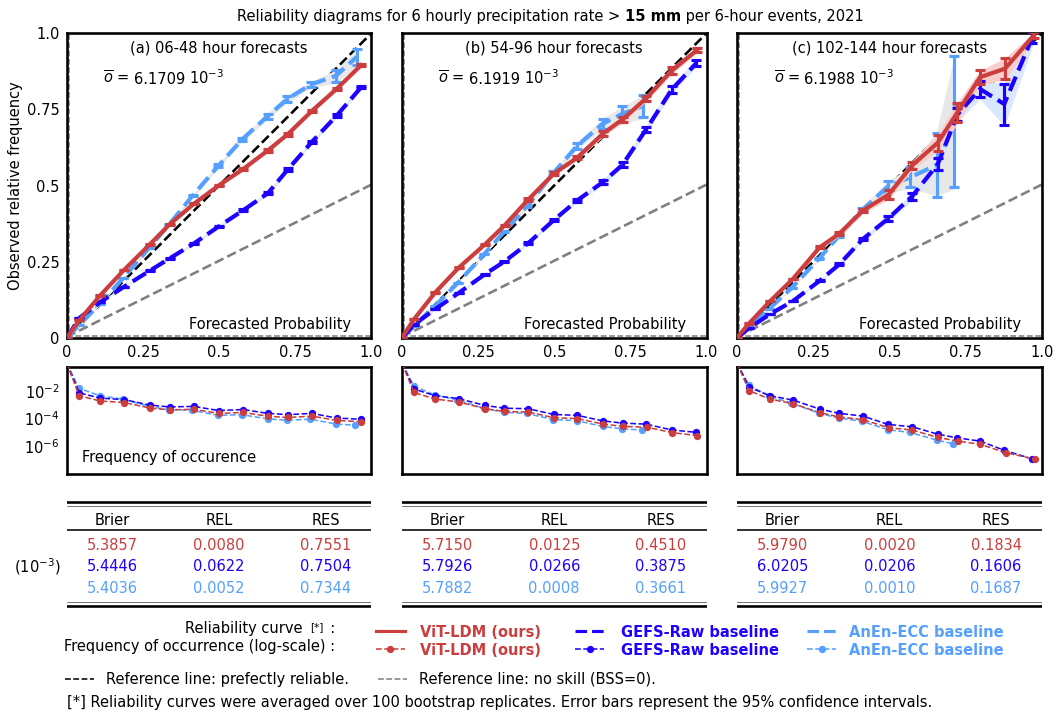

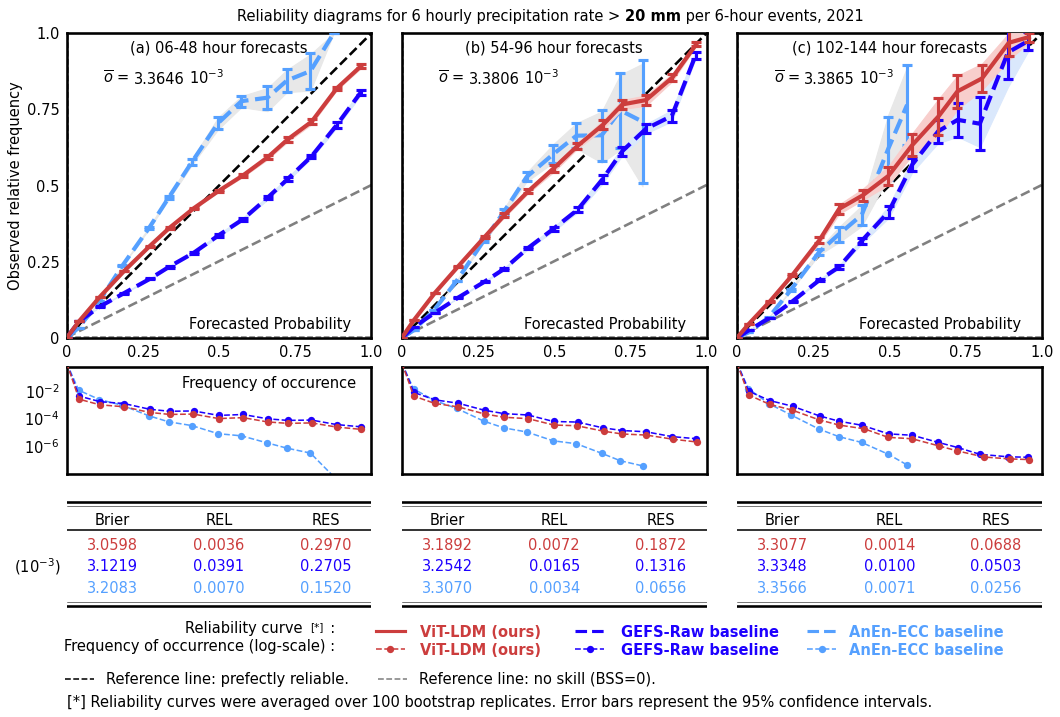

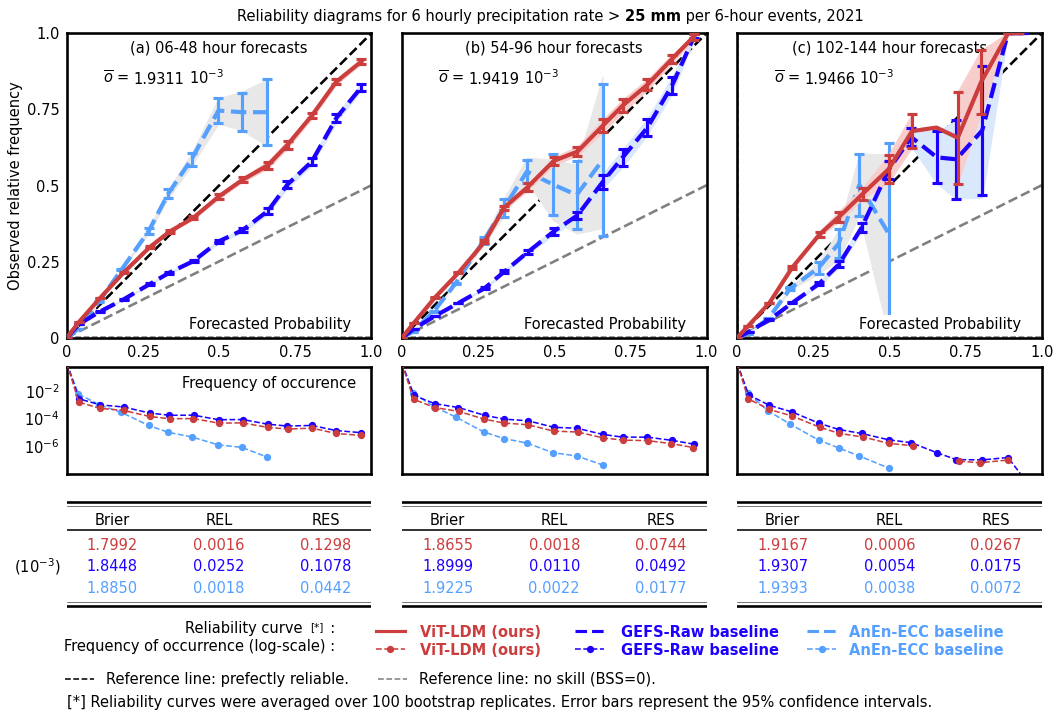

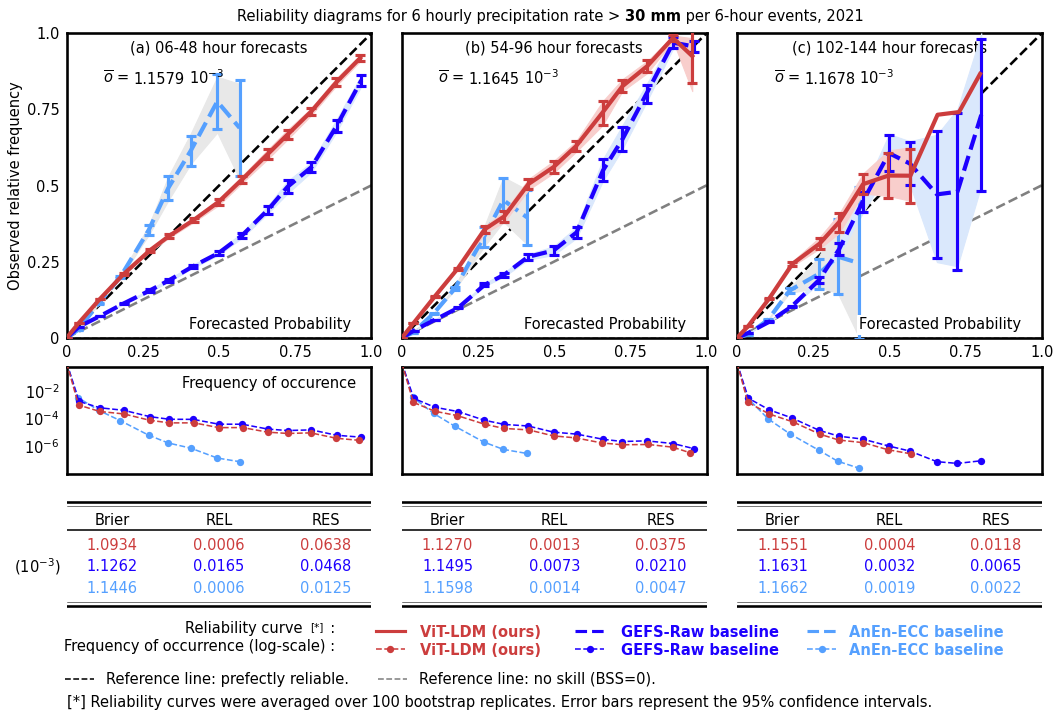

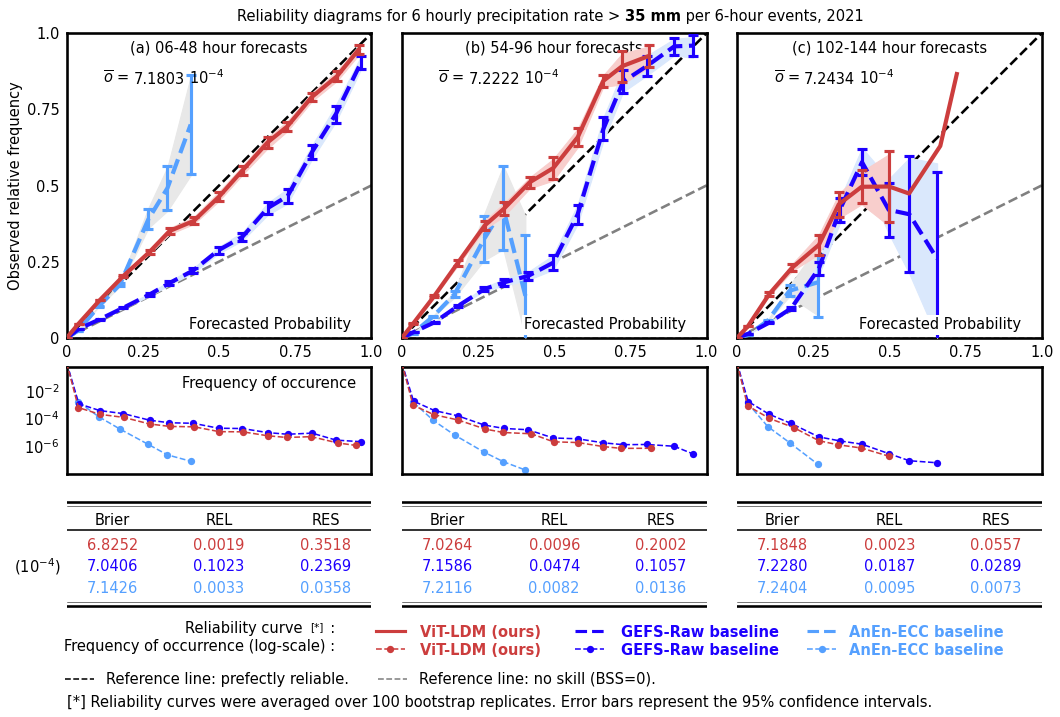

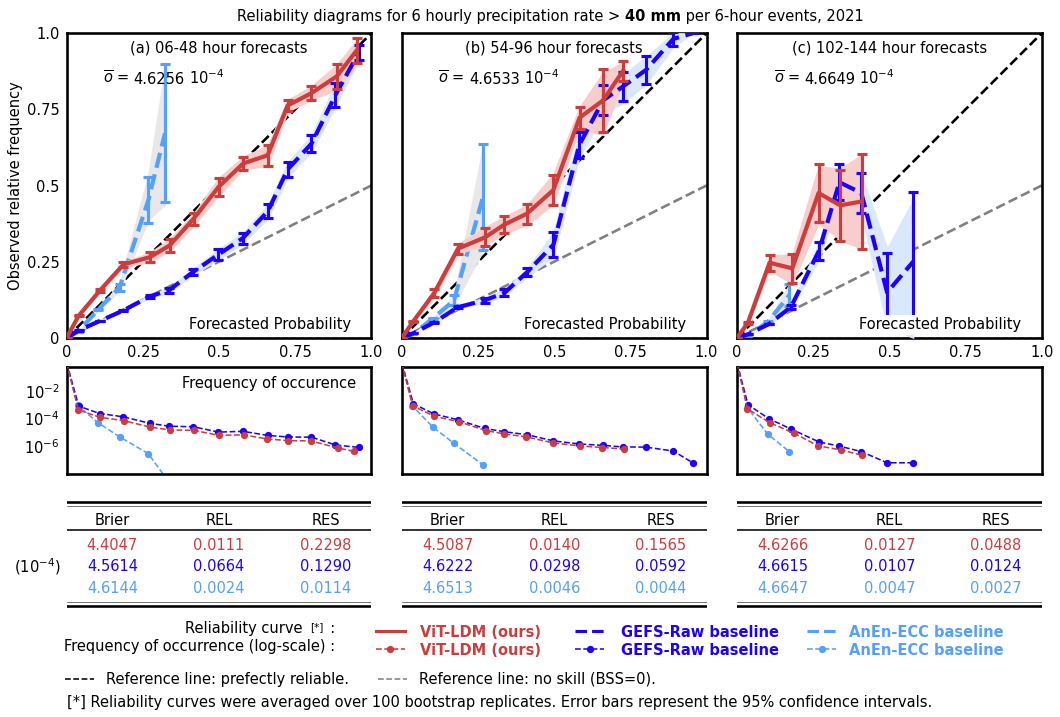

In [8]:
# 
for thres in [1, 5, 10, 15, 20, 25, 30, 35, 40]:
    RESULTS_LDM = [name_LDM_.format(thres, 0, 8), name_LDM_.format(thres, 8, 16), name_LDM_.format(thres, 16, 24)]
    RESULTS_RAW = [name_RAW_.format(thres, 0, 8), name_RAW_.format(thres, 8, 16), name_RAW_.format(thres, 16, 24)]
    RESULTS_AnEn = [name_AnEn_.format(thres, 0, 8), name_AnEn_.format(thres, 8, 16), name_AnEn_.format(thres, 16, 24)]

    if thres < 15:
        val_scale = 1e2
        val_scale_text = r'$10^{-2}$'
    elif thres < 35:
        val_scale = 1e3
        val_scale_text = r'$10^{-3}$'
    else:
        val_scale = 1e4
        val_scale_text = r'$10^{-4}$'
    
    linestyles = ['-', '--', '--']
    zorders_fill = [5, 4, 3]
    zorders_line = [6, 5, 4]
    zorder_word = 7
    
    # ref line coords
    fake_x = np.linspace(0, 1, 100)
    
    # sub-title names
    titles = ['(a) 06-48 hour forecasts', '(b) 54-96 hour forecasts', '(c) 102-144 hour forecasts']
    
    # ylocs for contents blow the main part of the figure
    ## legend, legend for the ref lines, [*] words, [**] wordds 
    locy_all_legends = [-0.08, -0.135, -0.165, -0.195] 
    
    # empty label name as placeholders
    label_ = ['                            ',
              '                                   ',
              '                         ']
    
    # collection of handdles for drawing legends
    handle_title = []
    handle_lines = []
    handle_errbar = []
    handle_refline = []
    
    fig = plt.figure(figsize=(13, 8), dpi=dpi_)
    
    # ----------------------------------------------------------------- #
    # axis arrangments
    #gs = gridspec.GridSpec(3, 5, height_ratios=[1, 0.001, 0.22], width_ratios=[1, 0.1, 1, 0.1, 1,])
    gs = gridspec.GridSpec(5, 5, height_ratios=[1, 0.01, 0.3, 0.075, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])
    
    AX_main = []; AX_text = []; AX_hist = []
    
    for i in [0, 2, 4]:
        AX_main.append(plt.subplot(gs[0, i]))
        AX_hist.append(plt.subplot(gs[2, i]))
        AX_text.append(plt.subplot(gs[4, i]))
    
    plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)
    
    # ----------------------------------------------------------------- #
    # Overall title
    ax_title = fig.add_axes([0.0, 0.97, 1.0, 0.03])
    title_len = 0.65
    handle_title += gu.string_partial_format(fig, ax_title, 0.5*(1-title_len), 0.5, 'left', 'center', 
                                             ['Reliability diagrams for 6 hourly precipitation rate > ', '{} mm'.format(thres), 
                                             ' per 6-hour events, 2021'], ['k',]*3, [14,]*3, ['normal', 'bold', 'normal'])
    for handle in handle_title:
        handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none'))
    
    # ----------------------------------------------------------------- #
    # axis settings for the reliability diagram (main)
    for i, ax in enumerate(AX_main):
        # sub-title
        ax.text(0.5, 0.975, titles[i], ha='center', va='top', fontsize=14, transform=ax.transAxes)
        # xlabel
        handle_xlabel= ax.text(0.4, 0.02, 'Forecasted Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes, zorder=6)
        handle_xlabel.set_bbox(dict(facecolor='w', edgecolor='w', pad=2))
        # axis settings
        ax = gu.ax_decorate_box(ax)
        ax.tick_params(axis="both", which="both", labelbottom=True)
        ax.set_xlim([0, 1])
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
        ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
        ax.set_ylim([0, 1])
        ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
        ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
        ax.set_aspect('equal')
        
    # left side y-axis ticks and label
    AX_main[0].set_ylabel('Observed relative frequency', fontsize=14)
    AX_main[0].tick_params(axis="both", which="both", labelleft=True)
    
    # ----------------------------------------------------------------- #
    # axis settings for the frequency of use subplots
    YLIM = [1e-8, 5e-1]; YLAB = [1e-6, 1e-4, 1e-2]
    # axis settings
    for i, ax in enumerate(AX_hist):
        ax = gu.ax_decorate_box(ax)
        ax.set_xlim([0, 1])
        ax.set_xticks([0, 0.5, 1.0])
        ax.set_xticklabels([0, 0.5, 1.0])
        ax.set_yscale('log')
        ax.set_ylim(YLIM)
        ax.set_yticks(YLAB)

    if thres > 15:
        AX_hist[0].text(0.95, 0.92, 'Frequency of occurence', ha='right', va='top', 
                        fontsize=14, transform=AX_hist[0].transAxes)
    else:
        AX_hist[0].text(0.05, 0.08, 'Frequency of occurence', ha='left', va='bottom', 
                        fontsize=14, transform=AX_hist[0].transAxes)
    AX_hist[0].tick_params(axis="both", which="both", labelleft=True)
    
    # ----------------------------------------------------------------- #
    # axis settings for bs component tables
    for i, ax in enumerate(AX_text):
        ax.axhline(0.990, xmin=0, xmax=1, linewidth=2.5, color='k')
        ax.axhline(0.950, xmin=0, xmax=1, linewidth=0.5, color='k')
        ax.axhline(0.725, xmin=0, xmax=1, linewidth=1.5, color='k')
        ax.axhline(0.050, xmin=0, xmax=1, linewidth=0.5, color='k')
        ax.axhline(0.010, xmin=0, xmax=1, linewidth=2.5, color='k')
    # ----------------------------------------------------------------- #
    # Tabel location settings
    locx_head = [0.15, 0.5, 0.85] # locations of each column
    locy_text = [0.65, 0.45, 0.25] # locations of each row
    table_heads = ['Brier', 'REL', 'RES'] # tabel headings
    fw_collection = ['normal', 'normal', 'normal'] # bold vs. normal font
    # ----------------------------------------------------------------- #
    
    for i in range(3):
        # get the axis for 0-48 vs. 48-96 vs. 96-144
        ax = AX_main[i]; ax_hist = AX_hist[i]; ax_text = AX_text[i]
    
        # add tabel headings
        for t in range(3):
            ax_text.text(locx_head[t], 0.74, table_heads[t], ha='center', va='bottom', 
                         fontsize=14, transform=ax_text.transAxes)
            
        # ------------------------------------------------------------------------------------------------------- #
        # tuple order: prob_true, prob_pred, bins, use, o_bar, prob_pred_mean, prob_true_mean, rel, res, o_bar, bs
        name_LDM = RESULTS_LDM[i]
        bundle_LDM = np.load(name_LDM, allow_pickle=True)[()]['save_bundle']
        name_AnEn = RESULTS_AnEn[i]
        bundle_AnEn = np.load(name_AnEn, allow_pickle=True)[()]['save_bundle']
        name_RAW = RESULTS_RAW[i]
        bundle_RAW = np.load(name_RAW, allow_pickle=True)[()]['save_bundle']
        bundle_collection = [bundle_LDM, bundle_RAW, bundle_AnEn,]
        
        for t, bundle in enumerate(bundle_collection):
            # ---------------------------------------------------------------- #
            # reliability diagram reference lines
            if t == 0:
                o_bar = bundle[-2]
                fake_y = 0.5*fake_x + 0.5*o_bar
                # climatology reference
                ax.text(0.07+0.05, 0.825, r'$\overline{o}$ = ', ha='left', va='bottom', 
                        fontsize=14, zorder=zorder_word, transform=ax.transAxes)
                
                ax.text(0.17+0.05, 0.825, '{:.4f}'.format(val_scale*o_bar), ha='left', 
                        va='bottom', fontsize=14, zorder=zorder_word, transform=ax.transAxes)
                
                ax.text(0.35+0.05, 0.825, val_scale_text, ha='left', va='bottom', 
                        fontsize=14, zorder=zorder_word, transform=ax.transAxes)
                
                ax.axvline(x=o_bar, ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
                ax.axhline(y=o_bar, xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
                # x=y line
                ax.plot(fake_x, fake_x, linewidth=2.5, linestyle='--', color='k')
                # bss=0 line
                ax.plot(fake_x, fake_y, linewidth=2.5, linestyle='--', color='0.5')
    
            # ---------------------------------------------------------------- #
            # reliability curves with boostrapping errorbars
    
            # 0.01 - 0.99 errorbar range
            temp_99 = np.quantile(bundle[0], 0.95, axis=1)
            temp_01 = np.quantile(bundle[0], 0.05, axis=1)
            error = 0.5*(temp_99 - temp_01)
            # draw reliability curves
    
            ax.fill_between(bundle[5], temp_01, temp_99, interpolate=True, 
                            color=colors_sub[t], zorder=zorders_fill[t])
            (_, caps, _) = ax.errorbar(bundle[5], bundle[6], yerr=error, linestyle=linestyles[t], capsize=5, 
                                       color=colors_main[t], linewidth=4.0, elinewidth=3.0, zorder=zorders_line[t])
            for cap in caps:
                cap.set_markeredgewidth(3)
            # ---------------------------------------------------------------- #
            # frequency of occurrence curves
    
            # get frequency of occurrence from occurrence counts
            use = bundle[3]; use[np.isnan(use)] = 0 # np.nan = no occurrence = 0
    
            # draw frequency of occurrence curves
            handle_lines += ax_hist.plot(bundle[2], use/np.sum(use), 
                                         color=colors_main[t], linestyle='--', linewidth=1.5, 
                                         marker='o', ms=7, mew=0, mfc=colors_main[t], label=label_[t], zorder=3-t)
            # ---------------------------------------------------------------- #
            # tabels for bs components
            ax_text.text(locx_head[0], locy_text[t], '{:.4f}'.format(val_scale*bundle[-1]), ha='center', va='top', 
                         color=colors_main[t], fontsize=14, fontweight=fw_collection[t], transform=ax_text.transAxes)
            ax_text.text(locx_head[1], locy_text[t], '{:.4f}'.format(val_scale*bundle[-4]), ha='center', 
                         va='top', color=colors_main[t], fontsize=14, transform=ax_text.transAxes)
            ax_text.text(locx_head[2], locy_text[t], '{:.4f}'.format(val_scale*bundle[-3]), ha='center', 
                         va='top', color=colors_main[t], fontsize=14, transform=ax_text.transAxes)
    # draw the unit of bs components
    AX_text[0].text(-0.02, 0.475, '('+val_scale_text+')', ha='right', va='top', fontsize=14, transform=AX_text[0].transAxes)
    
    # ----------------------------------------------------------------- #
    # legends of reliability curves and frequency of occurrence curves
    
    # pseudo legned handles for reliability curves
    for t in range(3):
        handle_errbar.append(mlines.Line2D([], [], label=label_[t], linestyle=linestyles[t], 
                                           color=colors_main[t], linewidth=3.0,))
    
    # get the axis for the entire legend
    ax_box = fig.add_axes([0, locy_all_legends[0], 1, 0.06])
    ax_box.set_axis_off()
    
    # subset the axis into heading (15% length) and legend content (85%)
    ax_lw1 = inset_axes(ax_box, height='50%', width='28%', borderpad=0, loc=2)
    ax_lw2 = inset_axes(ax_box, height='50%', width='28%', borderpad=0, loc=3)
    ax_lg1 = inset_axes(ax_box, height='50%', width='72%', borderpad=0, loc=1)
    ax_lg2 = inset_axes(ax_box, height='50%', width='72%', borderpad=0, loc=4)
    
    # add legend headings
    ax_lw1.text(1, 0.5, 'Reliability curve      : ', 
                ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
    
    ax_lw2.text(1, 0.5, 'Frequency of occurrence (log-scale) : ', 
                ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);
    
    ax_lw1.text(0.94, 0.58, '[*]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);
    
    # add legend content for reliability curves
    LG1 = ax_lg1.legend(handles=handle_errbar, bbox_to_anchor=(0.9075, 1.5), 
                       ncol=3, prop={'size':14}, fancybox=False); gu.legend_format(LG1)
    
    # add legend content for frequency of occurrence curves
    LG2 = ax_lg2.legend(handles=handle_lines[0:3], bbox_to_anchor=(0.9075, 1.5), 
                        ncol=3, prop={'size':14}, fancybox=False); gu.legend_format(LG2)
    
    # add legend texts
    locx_legend = [0.115, 0.4, 0.725]
    locy_legend = 0.7
    names_legend = ['ViT-LDM (ours)', 'GEFS-Raw baseline', 'AnEn-ECC baseline']
    
    for t in range(3):
        ax_lg1.text(locx_legend[t], locy_legend, names_legend[t], ha='left', va='top', 
                    fontsize=14, fontweight='bold', color=colors_main[t], transform=ax_lg1.transAxes)
        
        ax_lg2.text(locx_legend[t], locy_legend, names_legend[t], ha='left', va='top', 
                    fontsize=14, fontweight='bold', color=colors_main[t], transform=ax_lg2.transAxes)
    
    # ----------------------------------------------------------------- #
    # legends of reference lines
    
    # pseudo legned handles for reference lines
    handle_refline.append(mlines.Line2D([], [], label='Reference line: prefectly reliable.', 
                                        linestyle='--', color='k', linewidth=1.5))
    
    handle_refline.append(mlines.Line2D([], [], label='Reference line: no skill (BSS=0).', 
                                        linestyle='--', color='0.5', linewidth=1.5))
    
    ax_lg3 = fig.add_axes([0, locy_all_legends[1], 0.675, 0.05])
    LG3 = ax_lg3.legend(handles=handle_refline, bbox_to_anchor=(0.915, 1), ncol=2, 
                        prop={'size':14}, fancybox=False); gu.legend_format(LG3)
    
    # ----------------------------------------------------------------- #
    
    ax_words2 = fig.add_axes([0, locy_all_legends[2], 1.0, 0.02])
    ax_words2.text(0, 1, 
         '[*] Reliability curves were averaged over 100 bootstrap replicates. Error bars represent the 95% confidence intervals.', 
          ha='left', va='top', fontsize=14, transform=ax_words2.transAxes);
    
    # ----------------------------------------------------------------- #
    # turn-off all axis
    ax_lw1.set_axis_off()
    ax_lg1.set_axis_off()
    ax_lw2.set_axis_off()
    ax_lg2.set_axis_off()
    ax_lg3.set_axis_off()
    ax_title.set_axis_off()
    ax_words2.set_axis_off()
    for i, ax in enumerate(AX_text):
        ax.set_axis_off()
    
    if need_publish:
        # Save figure
        fig.savefig(fig_dir+'fig_appendix_reliability_diagram_{}mm.png'.format(thres), format='png', **fig_keys)